## Day 3 Exercises
## Orysya Stus
## DSE 200: Python for Data Analysis

### Day 3 Exercises

**Economics data set analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__
#print 'sklearn version:',sk.__version__
print 'matplotlib version:', matplotlib.__version__

pandas version:  0.19.0
numpy version: 1.11.2
matplotlib version: 1.5.3


In [3]:
path = "~/Documents/DSE/ostus/DSE200/data/economics/"
%cd $path

/home/orysya/Documents/DSE/ostus/DSE200/data/economics


In [4]:
!ls

AAA.csv  CPILFESL.csv  GS10.csv  INDPRO.csv
BAA.csv  GDPC1.csv     GS1.csv	 UNRATE.csv


In [5]:
filenames = !ls

dict_data = {}

for f in filenames:
    code = f.rstrip('.csv')
    dfile = pd.read_csv(f, header=0, skiprows=0, names=['Date', code], parse_dates=['Date'])
    dfile = dfile.set_index('Date')
    dict_data[code] = dfile
#have dictionary --> {code:dfile, ...}

merge = pd.concat(dict_data, axis=1)
merge.columns = merge.columns.droplevel() #was getting multi-level column index therefore dropped 1 level

print merge.count()
#Note that the dimensions of the tables do not match up
print merge.head()
print merge.tail()

AAA         1149
BAA         1149
CPILFESL     693
GDPC1        270
GS1          738
GS10         738
INDPRO      1149
UNRATE       801
dtype: int64
             AAA   BAA  CPILFESL  GDPC1  GS1  GS10  INDPRO  UNRATE
Date                                                              
1919-01-01  5.35  7.12       NaN    NaN  NaN   NaN  4.8582     NaN
1919-02-01  5.35  7.20       NaN    NaN  NaN   NaN  4.6435     NaN
1919-03-01  5.39  7.15       NaN    NaN  NaN   NaN  4.5092     NaN
1919-04-01  5.44  7.23       NaN    NaN  NaN   NaN  4.5898     NaN
1919-05-01  5.39  7.09       NaN    NaN  NaN   NaN  4.6166     NaN
             AAA   BAA  CPILFESL  GDPC1   GS1  GS10    INDPRO  UNRATE
Date                                                                 
2014-05-01  4.16  4.76   237.776    NaN  0.10  2.56  103.6619     6.3
2014-06-01  4.25  4.80   238.083    NaN  0.10  2.60  103.9503     6.1
2014-07-01  4.16  4.73   238.311    NaN  0.11  2.54  104.1916     6.2
2014-08-01  4.08  4.69   238.345

In [6]:
### Using a list instead, more straightforward ###
#1. Read each file iteratively
#import os
#filenames = next(os.walk("./"))[2]
#dict_data = []

#for f in filenames:
#    code = f.rstrip('.csv')
#    dfile = pd.read_csv(f, header=0, skiprows=0, names=['Date', code], parse_dates=['Date'])
#    dfile = dfile.set_index('Date')
#    dict_data.append(dfile)
#2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values 
#are the Series from each downloaded file
#merge = pd.concat(dict_data, axis=1)
#print merge.count()
##Note that the dimensions of the tables do not match up
#print merge.head()
#print merge.tail()

In [7]:
#3. Construct the Term and Default premia series using basic math on the series, and merge the resulting series using 
#JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] 
#- merged_data[’AAA’]
term_premium = merge['GS10'] - merge['GS1']
term_premium_df = pd.DataFrame(term_premium, term_premium.index)
term_premium_df = term_premium_df.rename(columns={0: 'Term_premium'})
print term_premium_df.shape

default_premium = merge['BAA'] - merge['AAA']
default_premium_df = pd.DataFrame(default_premium, default_premium.index)
default_premium_df = default_premium_df.rename(columns={0: 'Default_premium'})
print default_premium_df.shape

premium = pd.merge(term_premium_df, default_premium_df, how='inner', left_index=True, right_index=True)
merge_all = pd.merge(merge, premium, how='inner', left_index=True, right_index=True)
print merge_all.shape
print merge_all.head()
print merge_all.tail()

(1149, 1)
(1149, 1)
(1149, 10)
             AAA   BAA  CPILFESL  GDPC1  GS1  GS10  INDPRO  UNRATE  \
Date                                                                 
1919-01-01  5.35  7.12       NaN    NaN  NaN   NaN  4.8582     NaN   
1919-02-01  5.35  7.20       NaN    NaN  NaN   NaN  4.6435     NaN   
1919-03-01  5.39  7.15       NaN    NaN  NaN   NaN  4.5092     NaN   
1919-04-01  5.44  7.23       NaN    NaN  NaN   NaN  4.5898     NaN   
1919-05-01  5.39  7.09       NaN    NaN  NaN   NaN  4.6166     NaN   

            Term_premium  Default_premium  
Date                                       
1919-01-01           NaN             1.77  
1919-02-01           NaN             1.85  
1919-03-01           NaN             1.76  
1919-04-01           NaN             1.79  
1919-05-01           NaN             1.70  
             AAA   BAA  CPILFESL  GDPC1   GS1  GS10    INDPRO  UNRATE  \
Date                                                                    
2014-05-01  4.16  4.76  

In [8]:
#4. Process the data
#Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the 
#above data by ensuring the following dropping the rows with null values. Output data regularly to see if they are 
#following regular format. Use pandas.series.pct_change wherever necessary
merge_all.describe()

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,Term_premium,Default_premium
count,1149.000000,1149.000000,693.000000,270.000000,738.000000,738.000000,1149.000000,801.000000,738.000000,1149.00000
mean,5.835727,7.027267,115.771874,7553.945926,5.100786,6.062656,40.199634,5.833333,0.961870,1.19154
std,2.698710,2.854979,70.504082,4353.719577,3.235634,2.783603,31.402574,1.658893,1.111263,0.71077
min,2.460000,2.940000,28.500000,1930.300000,0.100000,1.530000,3.677200,2.500000,-3.070000,0.32000
25%,3.810000,4.890000,42.800000,3614.425000,3.030000,3.980000,12.051500,4.600000,0.152500,0.71000
50%,5.120000,6.480000,111.100000,6490.100000,4.960000,5.690000,34.539200,5.600000,0.860000,0.95000
75%,7.500000,8.480000,180.300000,11089.050000,6.850000,7.650000,61.876800,6.900000,1.730000,1.46000
max,15.490000,17.180000,238.677000,16010.400000,16.720000,15.320000,105.072800,10.800000,3.400000,5.64000


The count of each of the attribute values, shows varying amounts of nulls between values. Still, the distrubution of nulls across all of teh attributes is not specified. Further preprocessing is necessary.

In [10]:
A = merge_all.isnull()
B = pd.groupby(A, by=[A.index.year]).sum()
print 'Distribution of NaNs across attributes by year: '
B.head()

Distribution of NaNs across attributes by year: 


,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,Term_premium,Default_premium
1919,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,0.0
1920,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,0.0
1921,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,0.0
1922,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,0.0
1923,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,0.0


Tabular view of the distribution of NaNs across attributes by year is helpful, but a visualization is more powerful

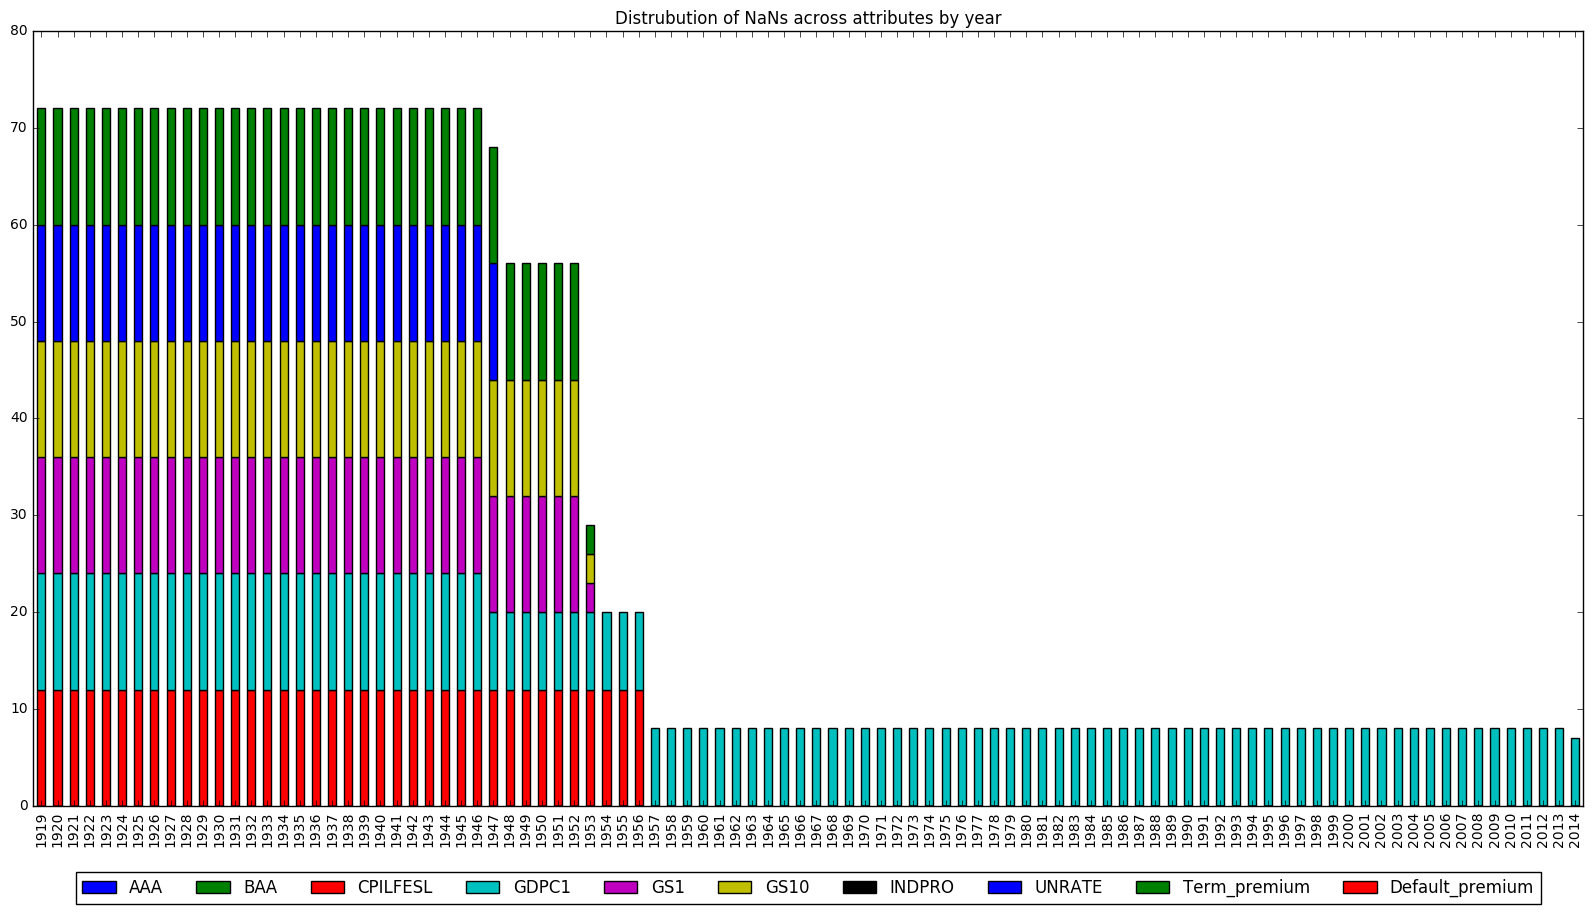

In [11]:
C = B.plot(kind="bar", figsize=(20,10), title='Distrubution of NaNs across attributes by year', stacked=True)
C.legend(bbox_to_anchor=(0.5, -0.075), loc='upper center', ncol=10)

The above graph shows that the years 1919-1946 contains complete missing values for attributes: CPILFESL, GDPC1, GS1, GS10, UNRATE, and Term_premium. Note: GDPC1 and INDPRO are reported quarterly, while the other attributes are reported monthly. From 1947-2014, GDPC1 is reported correctly inputted since 4/12 or monthly inputs are included. Questions should be asked in regards to what is happening in the data from 1947-1956, and determine what happened to the arbitrary data missing in 1954 (which is probably attributed to the data collection beginning sometime in the middle of the year

In [12]:
#View the distribution of NaNs from 1947 until 1956. 
B[(B.index >= 1947) & (B.index <= 1956)]

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,Term_premium,Default_premium
1947,0.0,0.0,12.0,8.0,12.0,12.0,0.0,12.0,12.0,0.0
1948,0.0,0.0,12.0,8.0,12.0,12.0,0.0,0.0,12.0,0.0
1949,0.0,0.0,12.0,8.0,12.0,12.0,0.0,0.0,12.0,0.0
1950,0.0,0.0,12.0,8.0,12.0,12.0,0.0,0.0,12.0,0.0
1951,0.0,0.0,12.0,8.0,12.0,12.0,0.0,0.0,12.0,0.0
1952,0.0,0.0,12.0,8.0,12.0,12.0,0.0,0.0,12.0,0.0
1953,0.0,0.0,12.0,8.0,3.0,3.0,0.0,0.0,3.0,0.0
1954,0.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
1955,0.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
1956,0.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#View in tabular format what is occuring across all months in the year 1953, determine what the reasons for null 
#variables in GS1 & GS10 are
merge_all[merge_all.index.year == 1953] 

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,Term_premium,Default_premium
Date,,,,,,,,,,
1953-01-01,3.02,3.51,NaN,2573.4,NaN,NaN,19.1375,2.9,NaN,0.49
1953-02-01,3.07,3.53,NaN,NaN,NaN,NaN,19.2448,2.6,NaN,0.46
1953-03-01,3.12,3.57,NaN,NaN,NaN,NaN,19.4059,2.6,NaN,0.45
1953-04-01,3.23,3.65,NaN,2593.5,2.36,2.83,19.4864,2.7,0.47,0.42
1953-05-01,3.34,3.78,NaN,NaN,2.48,3.05,19.5938,2.5,0.57,0.44
1953-06-01,3.40,3.86,NaN,NaN,2.45,3.11,19.5132,2.5,0.66,0.46
1953-07-01,3.28,3.86,NaN,2578.9,2.38,2.93,19.7548,2.6,0.55,0.58
1953-08-01,3.24,3.85,NaN,NaN,2.28,2.95,19.6474,2.7,0.67,0.61
1953-09-01,3.29,3.88,NaN,NaN,2.20,2.87,19.2448,2.9,0.67,0.59


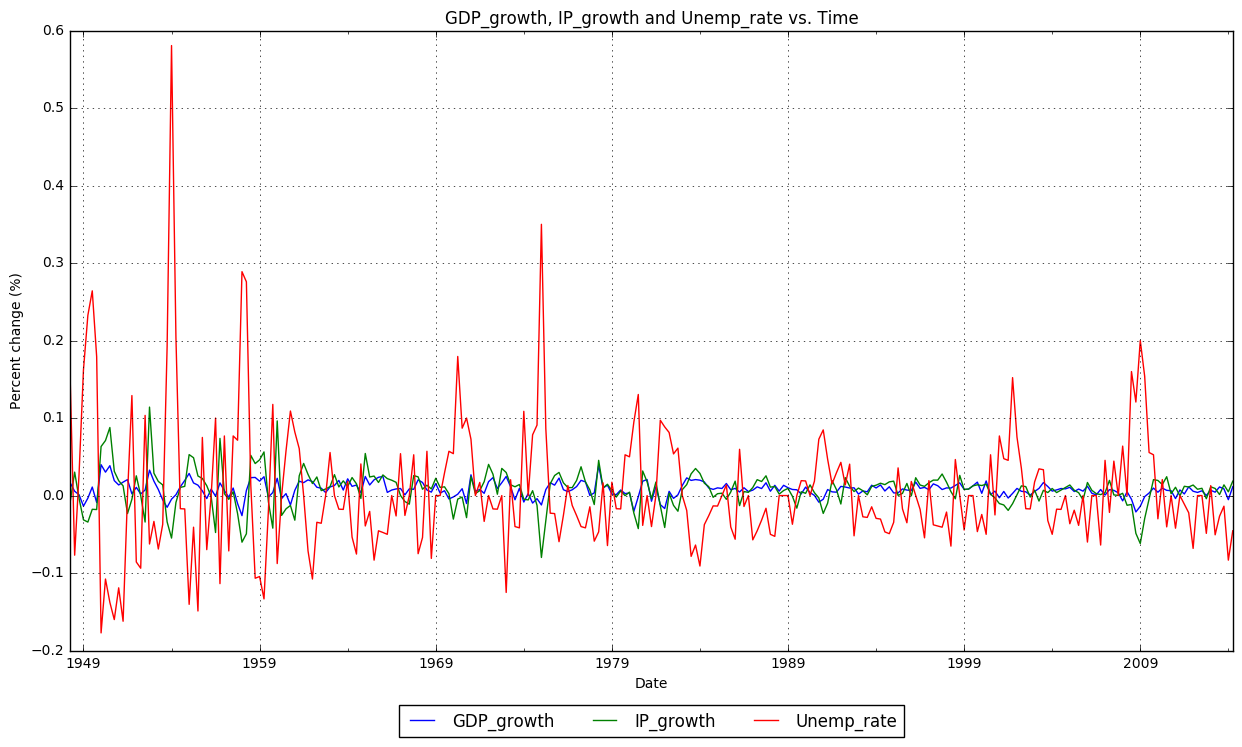

In [14]:
##Keep data where dates >= 1948, dates prior to 1948 contains many null values & want values for GDPC1, INDPRO, & UNRATE
A = merge_all[merge_all.index.year >= 1948] #note: values exist for GDPC1, INDPRO, and UNRATE (starting at 1948)
B = A[['GDPC1', 'INDPRO', 'UNRATE']] #Extract data for only the 3 attributes of interest
B = B.rename(columns={'GDPC1':'GDP_growth', 'INDPRO': 'IP_growth', 'UNRATE': 'Unemp_rate'})
B = B.dropna() #drop any rows that have nulls
B = B.pct_change().dropna()

#5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
C = B.plot(figsize=(15,8), title='GDP_growth, IP_growth and Unemp_rate vs. Time')
C.legend(bbox_to_anchor=(0.5, -0.075), loc='upper center', ncol=3)
plt.ylabel('Percent change (%)')
plt.grid(True)

Inferences from the plot above:
As expected, unemployment rate is indirectly correlated with GDP and IP growth. If the unemployment rate decreases then the GDP and IP growth is positive, the more drastic the decrease in unemployment rate, the more drastic the increase in GDP and IP growth. 

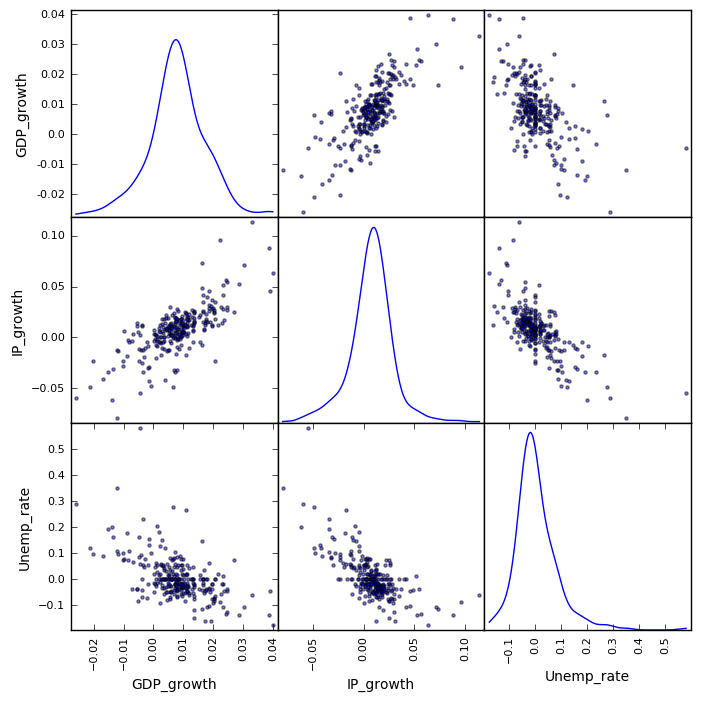

In [15]:
#6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a 
#mmatrix form with kernel density plots along the diagonals.
from pandas.tools.plotting import scatter_matrix
scatter_matrix(B, figsize=(8,8), diagonal='kde');

The distribution of the data does not demonstrate many incoherent datapoints, but does show that there are some outliers in the data, that can be further analyzed. 

**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

In [118]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/master/ch07/foods-2011-10-03.json'

import urllib, json
response = urllib.urlopen(url)
data = json.loads(response.read())
#print data

In [119]:
#Print the keys of data, in order to determine exactly 
data[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [120]:
#Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.
meta_data = pd.DataFrame(data, columns=['description', 'group', 'id', 'manufacturer'])
meta_data.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [121]:
#Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make 
#sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

#Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate 
#entries in this DataFrame. For example, if you had named the objects nuts you would do
#nuts = nuts.drop_duplicates()

#Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data 
#DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and 
#group and each nutrient also has those identifiers). 

nutrients = []

for i in data:
    nuts = pd.DataFrame(i['nutrients'])
    nuts['id'] = i['id']
    nuts = nuts.drop_duplicates('description')
    nutrients.append(nuts)

nutrients = pd.concat(nutrients, ignore_index=True)
nutrients = nutrients.rename(columns={'description':'nutrient_description','group':'nutrient_group','units':'nutrient_units','value':'nutrient_value'})
print 'Initial shape of nutrients dataframe: ', nutrients.shape
nutrients.head()

Initial shape of nutrients dataframe:  (368568, 5)


,nutrient_description,nutrient_group,nutrient_units,nutrient_value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [122]:
#Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and 
#nutritional information. Make sure to do an outer style merge on the correct columns.
foods = pd.merge(meta_data, nutrients, how="outer", on='id')
print 'The shape of the foods dataframe is: ', foods.shape
foods.head()

The shape of the foods dataframe is:  (368568, 8)


,description,group,id,manufacturer,nutrient_description,nutrient_group,nutrient_units,nutrient_value
0,"Cheese, caraway",Dairy and Egg Products,1008,,Protein,Composition,g,25.18
1,"Cheese, caraway",Dairy and Egg Products,1008,,Total lipid (fat),Composition,g,29.20
2,"Cheese, caraway",Dairy and Egg Products,1008,,"Carbohydrate, by difference",Composition,g,3.06
3,"Cheese, caraway",Dairy and Egg Products,1008,,Ash,Other,g,3.28
4,"Cheese, caraway",Dairy and Egg Products,1008,,Energy,Energy,kcal,376.00


In [123]:
#Using the foods DataFrame you have been building, compute the following things:
#1. The food item with the highest content of each nutrient.

A = foods.groupby('id')['description'].count().sort_values(ascending=False)
print 'The food item that has the highest content of total amount of nutrient is', foods['description'][foods['id'] == A.index[0]].unique() ,'has an id of ', A.index[0], 'with', A.iloc[0], 'nutrients.\n'

print 'The food item with the highest content of each nutrient: '
foods.groupby('nutrient_description').max()

The food item that has the highest content of total amount of nutrient is [ u'Potatoes, mashed, dehydrated, prepared from flakes without milk, whole milk and butter added'] has an id of  11379 with 92 nutrients.

The food item with the highest content of each nutrient: 


,description,group,id,manufacturer,nutrient_group,nutrient_units,nutrient_value
nutrient_description,,,,,,,
Adjusted Protein,"Mushrooms, white, raw",Vegetables and Vegetable Products,19078,,Composition,g,12.900
Alanine,"Yogurt, vanilla, low fat, 11 grams protein per...",Vegetables and Vegetable Products,90240,"Wendy's International, Inc.",Amino Acids,g,8.009
"Alcohol, ethyl","Yogurt, vanilla, low fat, 11 grams protein per...",Vegetables and Vegetable Products,93600,"The Quaker Oats, Co.",Other,g,42.500
Arginine,"Yogurt, vanilla, low fat, 11 grams protein per...",Vegetables and Vegetable Products,90240,"Wendy's International, Inc.",Amino Acids,g,7.436
Ash,"Yogurt, vanilla, low fat, 11 grams protein per...",Vegetables and Vegetable Products,93600,"Worthington Foods, Inc.",Other,g,72.500
Aspartic acid,"Yogurt, vanilla, low fat, 11 grams protein per...",Vegetables and Vegetable Products,90240,"Wendy's International, Inc.",Amino Acids,g,10.203
Beta-sitosterol,"T.G.I. FRIDAY'S, French fries",Vegetables and Vegetable Products,43215,T.G.I Friday's,Other,mg,426.000
Betaine,"Yogurt, fruit variety, nonfat, fortified with ...",Vegetables and Vegetable Products,43570,"Wendy's International, Inc.",Vitamins,mg,630.400
Caffeine,"Yogurt, vanilla, low fat, 11 grams protein per...",Vegetables and Vegetable Products,93600,"Wendy's International, Inc.",Other,mg,3680.000


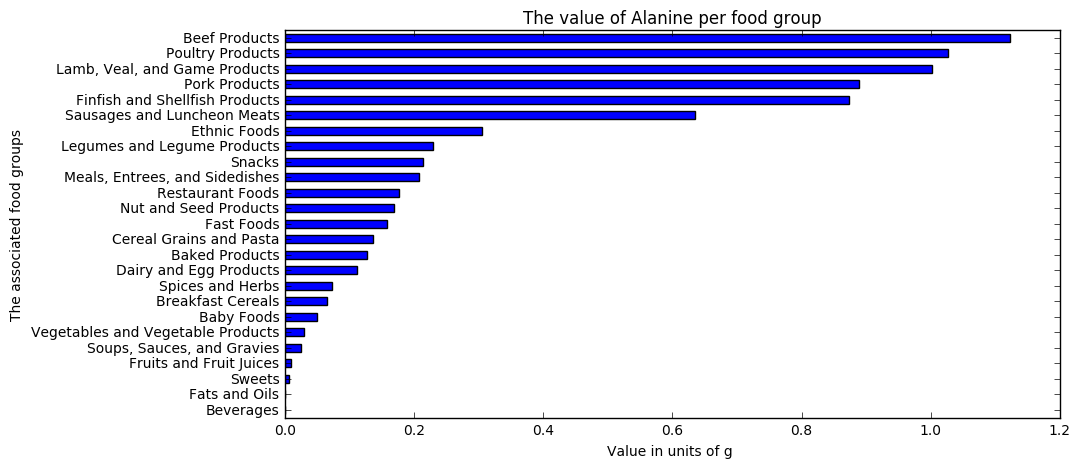

In [125]:
#2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of 
#that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) 
#methods in order for this to work.
def nutrient_compare(nutrient_nm, quantile_val):
    group_by = foods.groupby(['nutrient_description', 'group'])
    value = group_by['nutrient_value'].quantile(quantile_val)
    a = foods[foods['nutrient_description'] == nutrient_nm]['nutrient_units'].unique()
    units = ''
    for i in a:
        units += i + ' '
    ax = value[nutrient_nm].sort_values().plot(kind='barh', figsize=(10,5), title='The value of %s per food group' % nutrient_nm)
    ax.set_xlabel('Value in units of %s' % units)
    ax.set_ylabel('The associated food groups')
    

nutrient_compare('Alanine', 0.1)

**Classifying Digits**
SKLearn has many interesting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [126]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

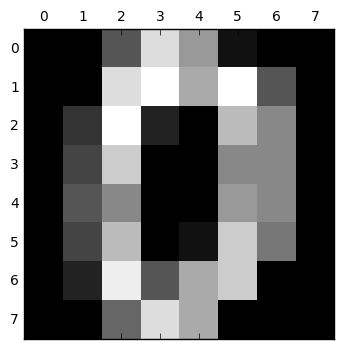

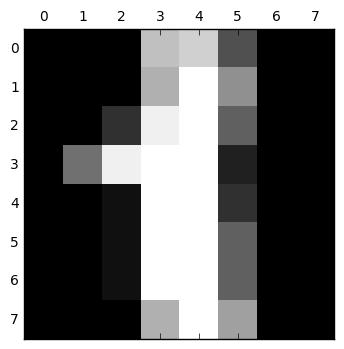

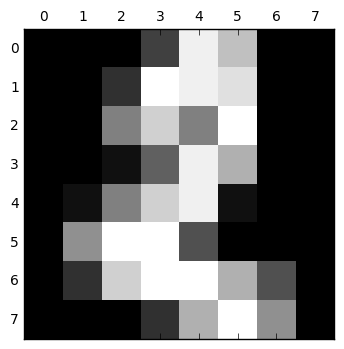

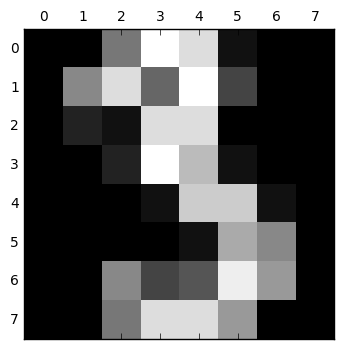

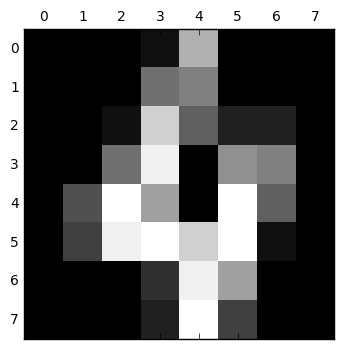

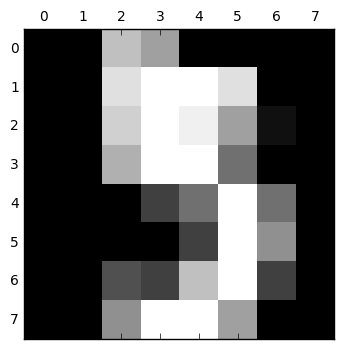

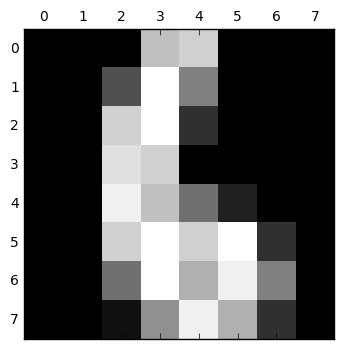

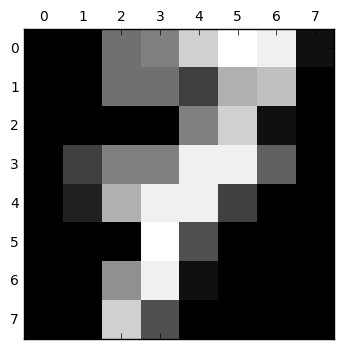

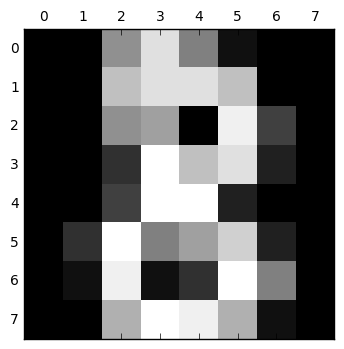

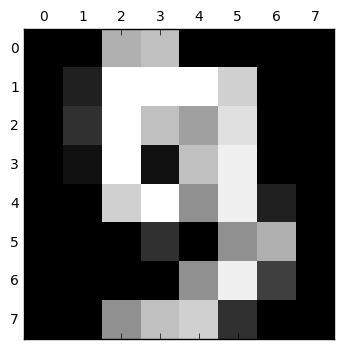

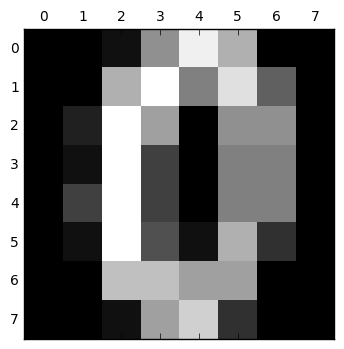

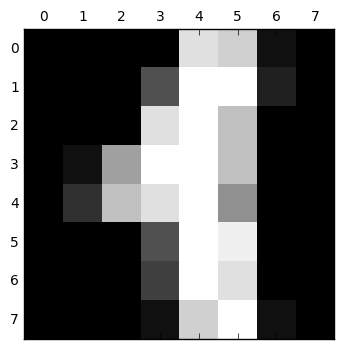

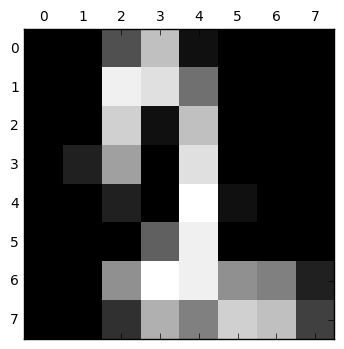

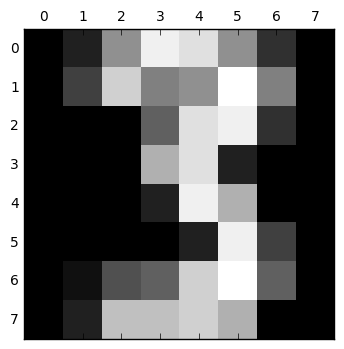

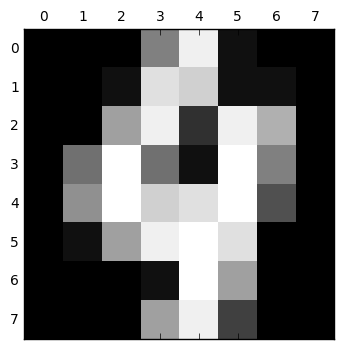

In [127]:
import pylab as pl 
pl.gray() 
for i in range(15):
    pl.matshow(digits.images[i]) 
    pl.show() 

Visualize the first 15 digits to get a better understanding of the data

**Dimensionality Reduction - PCA**

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the amount of information thrown away and plot the variance(cumulative) against the number of components  

In [128]:
print digits.keys()
print digits.data.shape
print digits.images.shape

['images', 'data', 'target_names', 'DESCR', 'target']
(1797L, 64L)
(1797L, 8L, 8L)


Data is nothing but a reshape of the images data describing itensity of pixels
Need to learn the target --> actual digit

In [129]:
print digits.data
print digits.target

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]


In [130]:
X, y = digits.data, digits.target
pca_dg = PCA(0.95)
X_proj = pca_dg.fit_transform(X)
print X.shape, X_proj.shape

(1797L, 64L) (1797L, 29L)


Therefore, need 29 components from 64 original features to explain 95% of original data

In [133]:
pca_dg = PCA(2)
X_proj = pca_dg.fit_transform(X)
print np.sum(pca_dg.explained_variance_ratio_)

0.285093648237


Retain 28% of the variance if choosing 2 components

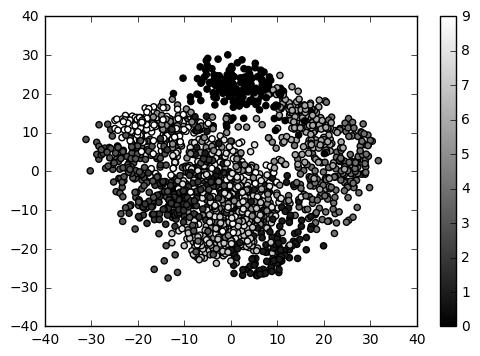

In [134]:
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.show()
#plots the 2 principal components & colors based on num = 0-9
#0 is by itself & 1 is near 7

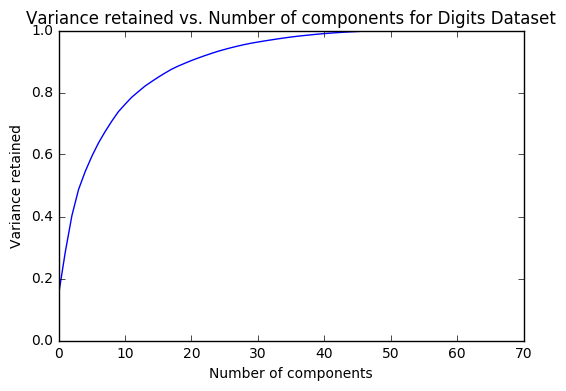

In [139]:
#Plot number of components vs explained variance ration as a cumulative sum
#to find out how much data needs to be thrown out
pca_dg = PCA(64).fit(X)
plt.plot(np.cumsum(pca_dg.explained_variance_ratio_))
#plt.semilogx(np.cumsum(pca_dg.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance retained')
plt.title('Variance retained vs. Number of components for Digits Dataset')
plt.ylim(0,1)
plt.show()

In [ ]:
Extra: Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
(this extended analysis need not be submitted as part of homework)